# Machine Learning Week 5 - Decision Trees

Decision trees use a tree structure to display algorithms that only contain control statements - or if/else statements. At each node, whether a condition is met or failed sends the user down one of two paths. This continues until the terminal state is reached. These diagrams are popular in business, with this diagram [(source)](https://hbr.org/1964/07/decision-trees-for-decision-making) showing a simple example of a cocktail party.

![Harvard Decision Tree](harvard.png)


### Decision Trees

In statistics, we do not technically make decisions - we train the model to make them for us. The algorithm selects the predictor that performs the optimal split at each node of the tree (technical term is recursive partioning). Decision trees can be either a classification or regression algorithm - this notebook shows classification. In a classification problem, the algorithm looks at the mixture of positive and negative outcomes on each side of the split - with more homogeneous groups being more 'pure' can preferred. 

![Titanic Decision Tree](DT.png)

The above graph represents the likely of survival for someone on the titanic. The outcome is inside of the node with thee accompanying numbers representing surivival chance (probability) and the precent of the dataset the node represents. A note: sibsp is a variable denoting how many siblings and spouses the passenger had - so denotes group size.

The goal is to start at the root node and continue to split while purity is being gained - hopefully finding the optimal model structure. However, this drive to split can lead the algorithm to get overly complex and overfit to the training data. To combat this, you can add several restrictions to the model:
- **tree depth** is how many levels the model has. Having more levels can improve accuracy but lead to overfitting.
- **minimum number of samples** controls how many samples can be in a node. If after a proposed split, a resulting node has less than n - the split is rejected. Having a lower minimum number can increase accuracy but lead to overfitting
- **minimum impurity split** controls whether a node will be split. If the impurity is above a threshold, a node will be split. Low values will generate higher accuracy at the cost of potential overfitting.

Additionally, ensemble methods (covered below) and performing dimensionality reduction tehcniques such as PCA (not covered in this notebook) are strategies often employed to combat overfitting.

**Purity Metrics**

There are two main purity metrics used in machine learning.

**Entropy** ranges between 0 and 1, with higher entropy scores meaning the data is less pure. Equivalently, this means that your prediction is less certain. *Note: Entropy can be more than one in cases with categorical outcome data with the same idea - higher is worse.*

![Entropy Range](entropy.png)
See this great [article](https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8) on purity measures for the source of this graph.

\begin{equation*}
Entropy = - \sum_{i = 1}^{n}p_{i} * Log_{2}(p_{i})
\end{equation*}

**Gini Index** also ranges between 0 and 1 - with 0 being a completely pure set while 1 is completely random. It measures the probability that a randomly chosen element from a set of data would be **incorrectly** labeled or misclassified. Gini index is commonly used with unbalanced data sets.

\begin{equation*}
Gini Index = 1 - \sum_{i = 1}^{n}p_{i}^{^{2}}
\end{equation*}


**Information Gain** puts entropy and gini into action. It figures out which predictor generates the maximum information gained by initating a split in the current dataset. 

Decision trees find which predictor will result in the lowest purity metric at each node split to construct the tree structure. *Note: This makes it a greedy algorithm - since it determines the best split at each node rather than optimizing the final prediction/purity score.*

In the algorithms covered in this notebook, entropy and gini are the two tuning option. While entropy is typically not preferred due to the ‘log’ function - as it increases the computational complexity - we will take the machine learning approach and test out both possibilities to see which gives us the best result. If you have a massive dataset, you could justify eschewing entropy for gini only.

**A note on regression trees**

Error metrics such as mean squared error are used instead of purity measures. However, as regression error metrics have no natural scale (unlike the 0-1 of gini/entropy), it is more difficult to set the error metric as a split condition (minimum impurity split above). Besides that, the methods are identical.

**Pros and Cons**

Pros
- non-linear
- can handle numeric and categorical data
- does not need the data to be scaled -- aids in ease of interpretation
- non-parametric method
- can handle multiple outcome variables
- robust (performs well if assumptions are violated)

Cons
- prone to overfitting
- can be unstable (small variations in the data may result in a completely different tree stucture)
- can find a suboptimal solution due to the greedy nature of the algorithm
- often biased towards the majority class. Data rebalancing is often used in conjuncture with the algorithm.
- often less accurate than comparable methods
- information gain (gini or entropy) is [biased towards categories with more levels](https://www.researchgate.net/publication/221079908_Bias_of_Importance_Measures_for_Multi-valued_Attributes_and_Solutions)
- large trees can be difficult to interpret


**Time complexity**

A balanced tree has a O(log(n)) time complexity, while an unbalanced tree has a O(n) time complexity in the worse case. As such, these algorithms are often faster than comparable methods. Coupled with the potential for feature selection and its ease of interpretation, decision trees and its dervative methods are often used with big data.


### Bagging

Ensemble models - made up of multiple weak predictors - are often superior to singular strong classifiers. Bagging (or bootstrap aggregation) can be used to generate multiple weak decision trees. Bootstrapping involves randomly sampling a dataset and is a common statistical technique. Bagging bootstraps the data (with replacement) to create random subset of the data for each individual tree. The goal is to reduce the variance, potential to overfit, and sensitvity to noise of the model. The higher the number of trees being aggregated, the greater the accuracy, less likely to overfit and more computationally expensive the model is. The most common bagging application is the random forest.

**Out-of-Bag Estimation**

You may see this term at some point. It is closely related to cross validation, but not quite the same. Since we use bootstrapping to select a subset of the data for each tree, we also have the observations NOT used to train those trees. Those observations are referred to as out-of-bag (OOB). To check the accuracy of your model, you can use the observations for each tree that are OOB (note that each tree will have different observations to use). After using a majority vote, we can calculate error rates that can be viewed as equivalent to test set error. 

#### Random Forest

As the name implies, decision trees are the building blocks of the random forest. The forest is comprised of a user-defined number of decision trees. Each one is trained on a different subset of the data. Additionally, at each node a random subset of predictors are examined for information gain (not all predictors are checked at each node). This process is called decorrelating the trees. A rule of thumb for the number of predictions to sample is to use the m = sqrt(p) for classification problems and m = p/3 for regression problems. If m == p, then random forests are equivalent to bagging. The results of these weaker decision trees are then averaged to generate a singular prediction. While there is no longer an single, easy tree diagram to interpret, methods like variable importance plots can be used to draw inferences around feature importance. 

![Random Forest Example](RF.png)

**Pros and Cons**

Pros
- same as decision trees
- less likely to overfit
- can be more accurate than decision trees
- can be run in parallel as the models are independent of one another
- using a subset of random predictors can overcome correlation and diminish the impact of a really strong predictor
- works well with missing data - however not all implementations work with missing data
- Overcomes the instability of decision trees
- Overcomes the chance of a single decision tree to be sub-optimal

Cons
- increased computational intensity
- slightly more difficult to interpret results
- can be less accurate than a boosted model


### Boosting


Boosting is the same as bagging with one key difference - the sampling technique. While bagging gives every data point an equal probability of being selected, boosting increases the weight (probability of being selected) for data points that the previous tree miscassified. Each tree is essentially trying to improve on the performance of the previous one. *Note about regression models: Misclassification is replaced by those with an error metric above a preset cutoff or will assign weight based on the rank of the magnitude of the error.*

Boosting methods utilize the same concept of aggregating many weak predictors into a single strong predictor. A common method in boosting (but not bagging), is to only perform a single split (which means using only one predictor per model). This process is referred to as Decision stumps. The rules from each of the weak predictors can be combined into a longer set of rules for the aggregated tree - known as adaptive boosting or AdaBoost. 

Gradient boost is another common boosting technique that is more flexible than AdaBoost. It does not use decision stumps. 


#### Gradient Boost

Gradient Boosting's largest deviation from the standard boosting procedure lies in the data used to fit each successive model. Rather than using weighting to attempt to select more of the misclassified observations, each tree uses the residuals from the previous tree as its input data. So each tree looks to improve upon the errors of the last tree. Since it is using residuals, rather than a subset of the observations, for each model - gradient boosting does not employ bootstrapping.

Gradient boosting relies on using a differentiable loss function - such as a log loss in classification problems. Each successive tree looks to reduce the loss function by using a gradient descent procedure. In other words, each tree must follow the gradient of the loss function - resulting in a lower global loss value. 


![Gradient Boost Example](GB.png)

**Classification Residuals**


For a classification residual, we are actually using a psuedo-residual which takes the same format as a standard one: Residual = Observed - Predicted. The tree has a probability of a positive outcome (ranging between 0 and 1) which is the predicted value. Each observation is either 0 (negative) or 1 (positive). These psuedo-residuals are then the inputs into the next tree. The math behind this is more complex than this. If you are interested, please see this [very detailed explantion](https://blog.paperspace.com/gradient-boosting-for-classification/)

![Classification Residual](resid.png)

In the above picture, the probabiliity is 0.7. That means that the residuals for positive classifications (1) would be 1 - .7 = 0.3. For negative outcomes (0), the residuals would be 0 - .7 = -0.7.

**Learning rate**

The learning rate scales the contributiion from each tree - controlling the degree to which each tree contributes to the final model. It is also referred to as lambda or the shrinkage rate. The term shrinkage refers to the fact that each of the predictions from each tree is shrunk by the learning rate. Since the learning rate varies between 0 and 1, if you multiply it by the prediction, you will decrease the predicted value. The shrunk predictions are then summed to get the final outcome. If you decrease the learning rate, you need to increase the number of trees used in the model. learning rates are often small values such as 0.1.


**Rule of thumb**

Maximum number of leaves typically ranges from 8 to 32. 


**Pros and Cons**

Pros
- the same as random forests
- can be more accurate than random forest
- no tuning is needed to create a weak predictor - reducing computational demand
- can reduce bias and significantly reduce variance (a departure from the normal bias-variance tradeoff)
- fast even with large and complex data
- often the superior machine learning model to use on a problem
- can be used for multi-class classification
- you can use penalized weights (L1 or L2) with the leaf nodes to regularize your model

Cons
- As this is a sequential process, it cannot be run in parallel
- Is more computationally expensive than random forests
- more parameters to tune


There is a popular extension of gradient boost called [XGBoost (extreme gradient boost)](https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/?ref=lbp) that you can check out if you are interested!

In [4]:
#pip install shap
#pip install mlxtend

In [7]:
### loading packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.inspection import permutation_importance
import shap


from mlxtend.plotting import plot_decision_regions

import math


## Functions

These functions will be used in the analysis below to get the model results.

In [8]:
def get_results(truth, prediction, df, idx):
    
    y_test2 = truth.map({'benign':0, 'malignant':1})
    y_pred2 = pd.Series(prediction).map({'benign':0, 'malignant':1})


    acc = accuracy_score(y_test2, y_pred2)
    f1 = f1_score(y_test2, y_pred2)
    precision = precision_score(y_test2, y_pred2)
    recall = recall_score(y_test2, y_pred2)

    df.loc[idx,:] = [acc, f1, precision, recall]

    return df


# Data

We will be reusing the data from week 1 and looking to see how we can improve upon our results from that practical. 

To refresh everyone, the dataset consists of features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass with the desired outcome of determining whether a tumor is beign or malignant. 


## Loading and inspecting the data

The data is avaiable here - https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

With a kaggle competition showing more detail about the variables here - https://www.kaggle.com/uciml/breast-cancer-wisconsin-data


## Cleaning the data

We will follow the same cleaning steps as in week 1. However, in that week we looked at how using different imputation and upsampling techniques could impact the outcome. This week we will use one dataset and compare multiple tuned methods.

A refresher on what was done:

**Extra Columns**

We drop the ID values in column 0. 

**Column Names**

We add in the correct column names.

**Response Variable** 

We recode the response columns to be beign or malignant.

**Missing Values**

Since only 2.2% of the data is missing, we will assumed MCAR and perform a complete cases analysis (drop all the rows with missing values).

**Splitting Data**

As with all ML analysis, we will split the data into test and train/


In [9]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header = None)
data

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [10]:
data.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
5      int64
6     object
7      int64
8      int64
9      int64
10     int64
dtype: object

In [11]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [12]:
data.iloc[:,6].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: 6, dtype: int64

In [13]:
# Cleaning the data

## Extra Columns

data = data.iloc[:,1:] # dropping the ID column

In [14]:
## Column Names

data.columns= ['Thickness', 'size_uniformity', 'shape_uniformity', 'adhesion', 'size', 'nuclei', 'chromatin', 
              'nucleoli', 'mitoses', 'target']

In [15]:
## Response Variable

print(data.iloc[:,-1].value_counts())

data.iloc[:,-1] = data.iloc[:,-1].map({2:'benign', 4:'malignant'})

print(data.iloc[:,-1].value_counts())

data.iloc[:,-1] = data.iloc[:,-1].astype('category')

2    458
4    241
Name: target, dtype: int64
benign       458
malignant    241
Name: target, dtype: int64


In [16]:
## Missing Values - Special Values

print(data.isnull().sum())

data.iloc[:,5].replace(to_replace = '?', value = np.nan, inplace = True)

print(data.isnull().sum())

Thickness           0
size_uniformity     0
shape_uniformity    0
adhesion            0
size                0
nuclei              0
chromatin           0
nucleoli            0
mitoses             0
target              0
dtype: int64
Thickness            0
size_uniformity      0
shape_uniformity     0
adhesion             0
size                 0
nuclei              16
chromatin            0
nucleoli             0
mitoses              0
target               0
dtype: int64


In [17]:
## Missing values

data = data.dropna()

print(data.shape)

(683, 10)


In [18]:
## Correcting data types
data.iloc[:,5] = data.iloc[:,5].astype('int')

print(data.dtypes)

Thickness              int64
size_uniformity        int64
shape_uniformity       int64
adhesion               int64
size                   int64
nuclei                 int64
chromatin              int64
nucleoli               int64
mitoses                int64
target              category
dtype: object


In [19]:
## Splitting data


X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=8)


# Analysis

We will be looking at the Decision Tree, Random Forest, and Gradient Boost algorithms. All three have tree structures at their core.



## Decision Tree

We will be using the [sklearn decision tree classifer](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). 

**Important Parameters**

criterion refers to the purity measure used and can be either gini or entropy. Defaults to gini.

max_depth sets the maximum tree depth. If None is selected, it will grow until maximum purity is reached or until the mini_samples_split is reached.

min_samples_split is the minimum number of observations needed to generate a split. Defaults to 2.

min_samples_leaf is the minimum number of observations allowed in each leaf that results from a split. If the number of observations is less than this value, the split will be rejected. Defaults to 1.

max_features is the number of features to consider when looking for the best split. Defaults to None - which means using all the features in the dataset.

random_state needs to be set for reproducibility.

min_impurity_decrease refers to the purity metric value that controls whether a split occurs. If the purity metric is above or equal to this value, a split will occur. Defaults to 0.

There are other parameters available to the user, but these are a great place to start!


**gridsearchcv**

To tune out hyperparameters, we will use [gridsearchcv](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from sklearn. It creates a grid of all of your parameter values and tests all possible combinations - using cross validation to select the best ones from the training data.

We will be tuning on the purity metric used (criterion), depth of the tree (max_depth), and the minimum number of resulting observations required to accept a spliit (min_samples_leaf). The idea is to look at how varying the size (depth) and complexity (number of nodes) impacts our performance. Other parameters address these two concepts, but from different angles (such as min_samples_split vs min_samples_leaf).


In [21]:
## Set up results df

results = pd.DataFrame(index = ['Decision Tree', 'Random Forest', 'Gradient Boost'], 
                       columns = ['accuracy', 'f1', 'precision', 'recall'])

In [22]:
parameters = {'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

clf = GridSearchCV(DecisionTreeClassifier(random_state = 8), 
                   parameters, n_jobs=3)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_

y_pred = tree_model.predict(X_test)

## Convert strings to ints to work with accuracy score functions
y_test2 = y_test.map({'benign':0, 'malignant':1})
y_pred2 = pd.Series(y_pred).map({'benign':0, 'malignant':1})

results = get_results(y_test, y_pred, results, 'Decision Tree')

accuracy = 0.9635036496350365, f1 = 0.9514563106796116. precision = 0.98, recall = 0.9245283018867925
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2}


Pass labels=['malignant', 'benign'] as keyword args. From version 0.25 passing these as positional arguments will result in an error


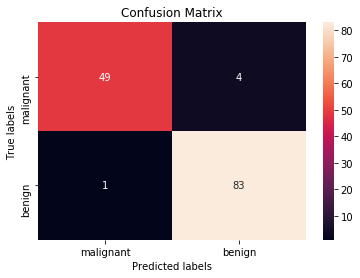

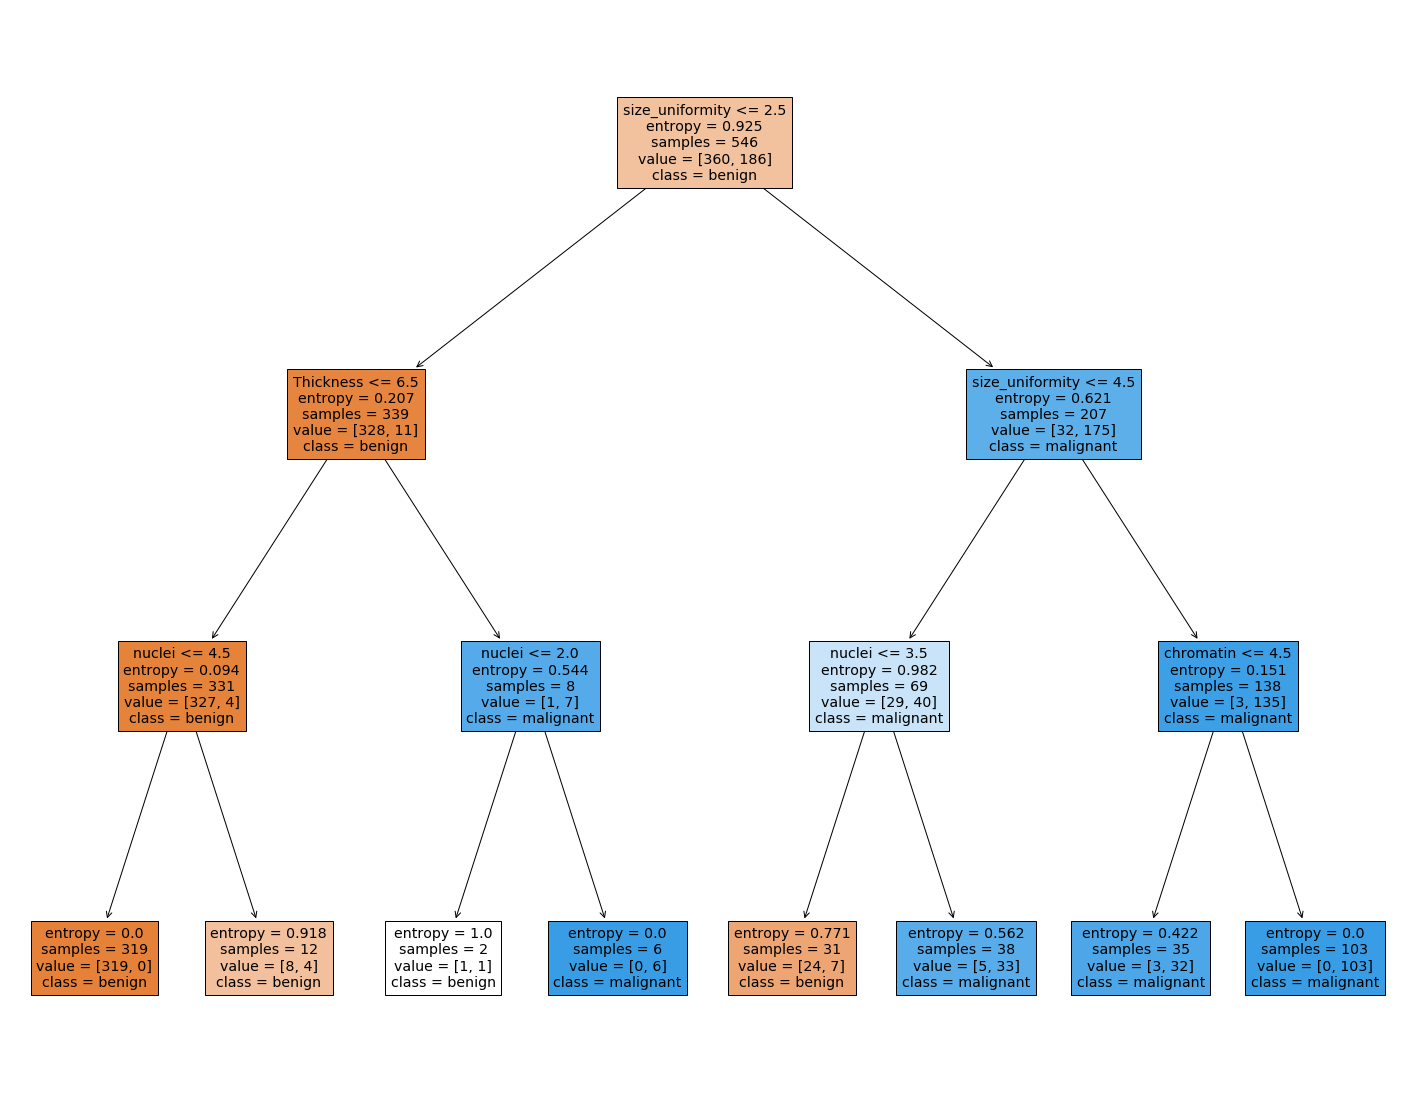

In [26]:
acc = accuracy_score(y_test2, y_pred2)
f1 = f1_score(y_test2, y_pred2)
precision = precision_score(y_test2, y_pred2)
recall = recall_score(y_test2, y_pred2)

print('accuracy = {}, f1 = {}. precision = {}, recall = {}'.format(acc, f1, precision, recall))
print(clf.best_params_)

labels = ['malignant', 'benign']
cm = confusion_matrix(y_test, y_pred, labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['malignant', 'benign']); 
ax.yaxis.set_ticklabels(['malignant', 'benign'])

plt.show()


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model, 
                   feature_names=X_train.columns,  
                   class_names=['benign', 'malignant'],
                   filled=True)

fig.savefig("decistion_tree_CV.pdf") # Easy to see the graph here

## Random Forest (Ensemble Method)

We will be using the [sklearn random forest classifiier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

**Important Parameters**

The same as decision tree with the addition of:

n_estimators controls the number of trees used. Defaults to 100.

oob_score controls whether to use out-of-bag samples to estimate the model accuracy. Defaults to False.

max_samples controls the number of samples to use for each tree (how many are you bootstrapping). If the input is an integer, it sets the value to sample. If it is a float, then it sets the percent of observations to use.

max_features will be set to the sqrt(p) - max_features = 'sqrt' - to follow the rule of thumb for random forests.


**Interpreting the results**

As a random forest is made up of many decision trees, we cannot create an intuitive tree plot for the results. Instead, there are three methods to see which features are most important.

*Variable Importance Plots*

These plots show how each feature decreases impurity on average. You can think of it as displaying which variables are toward the top of the underlying decisiion trees the most. The drawbacks of the method is to tendency to prefer (select as important) numerical features and categorical features with high cardinality. This is the most common feature importantance plots used with random forests.

*Permutation Based Feature Importance*

The permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one. Drawbacks include that the method is computationally expensive and can have problem with highly-correlated features, it can report them as unimportant.

*SHAP Values*

Using the Shapley values from game theory, the plots can be used to estimate how each feature contributes to the prediction. 




The features for internal nodes are selected with some criterion, which for classification tasks can be gini impurity or infomation gain, and for regression is variance reduction.


In [27]:
parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 
              'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8),
                        parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)

## Convert strings to ints to work with accuracy score functions
y_pred2 = pd.Series(y_pred).map({'benign':0, 'malignant':1})

results = get_results(y_test, y_pred, results, 'Random Forest')


print('The best parameters are {}'.format(rf_class.best_params_))

The best parameters are {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 50}


In [29]:
features = X_train.columns
features

Index(['Thickness', 'size_uniformity', 'shape_uniformity', 'adhesion', 'size',
       'nuclei', 'chromatin', 'nucleoli', 'mitoses'],
      dtype='object')

In [32]:
importances = rf_model.feature_importances_
importances

array([0.04125006, 0.3076635 , 0.24002359, 0.00703016, 0.07817774,
       0.12007534, 0.13071668, 0.07396615, 0.00109677])

In [31]:
indices = np.argsort(importances)
indices

array([8, 3, 0, 7, 4, 5, 6, 2, 1])

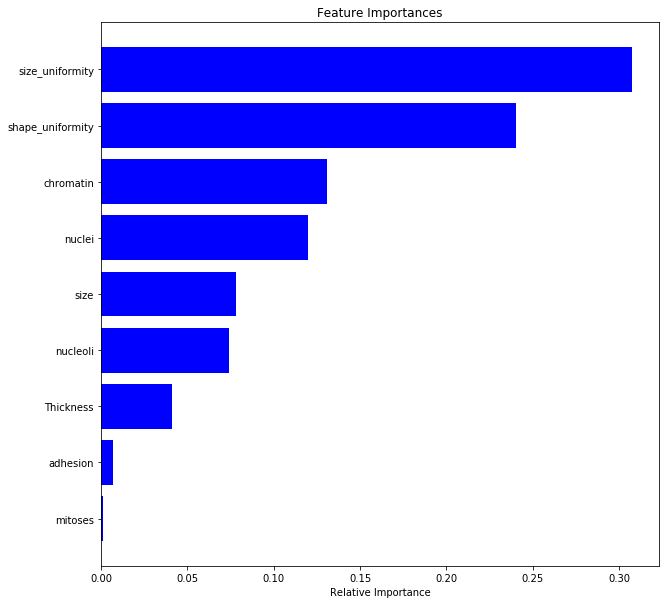

In [28]:
#### Plotting the Variable importance plot

plt.figure(figsize= (10,10))
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b',
         align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

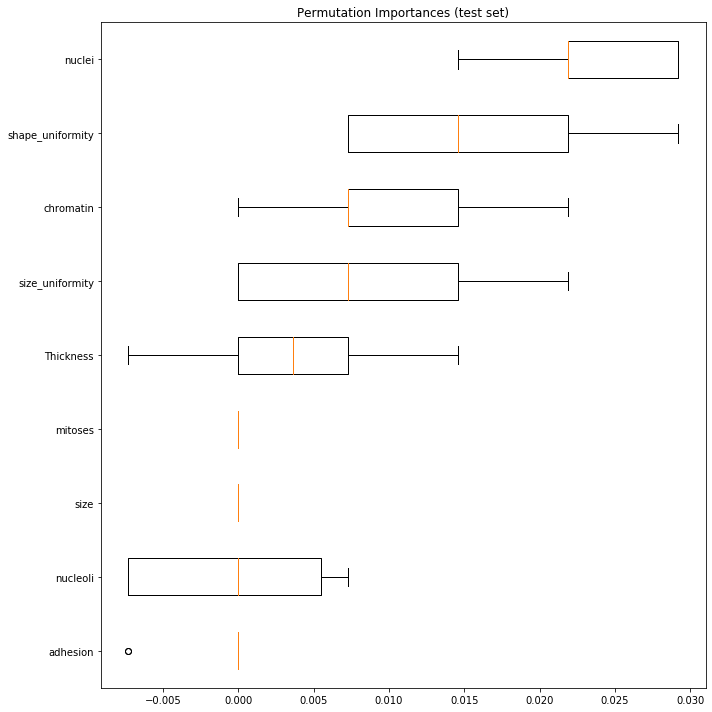

In [31]:
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (10,10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [34]:
shap_values

[array([[-0.05199657, -0.09615391, -0.12351009, ..., -0.10637354,
         -0.06442525,  0.00347512],
        [ 0.01247562,  0.09899345,  0.08686858, ...,  0.05124524,
          0.01941798,  0.00054682],
        [ 0.01845919,  0.10709909,  0.08877265, ...,  0.03444634,
          0.02542407,  0.00074593],
        ...,
        [ 0.02120374, -0.18949749, -0.0806118 , ..., -0.13387734,
         -0.10156879, -0.00637298],
        [ 0.01782393,  0.10158887,  0.08603715, ...,  0.0336913 ,
          0.02094518,  0.00074593],
        [ 0.01748756,  0.09763567,  0.08496116, ...,  0.04760802,
          0.01858683,  0.00074593]]),
 array([[ 0.05199657,  0.09615391,  0.12351009, ...,  0.10637354,
          0.06442525, -0.00347512],
        [-0.01247562, -0.09899345, -0.08686858, ..., -0.05124524,
         -0.01941798, -0.00054682],
        [-0.01845919, -0.10709909, -0.08877265, ..., -0.03444634,
         -0.02542407, -0.00074593],
        ...,
        [-0.02120374,  0.18949749,  0.0806118 , ...,  

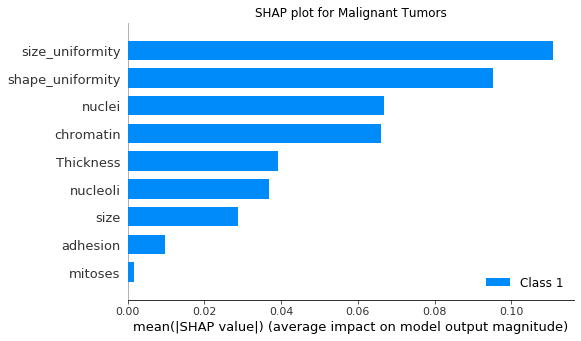

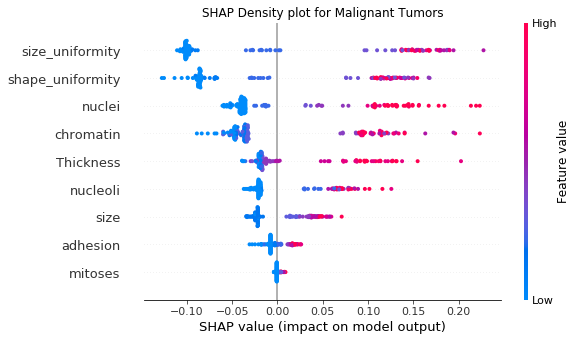

In [42]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

plt.title('SHAP plot for Malignant Tumors')
shap.summary_plot(shap_values, features = X_test, class_inds = [1])
plt.show()

plt.title('SHAP Density plot for Malignant Tumors')
shap.summary_plot(shap_values[1], features = X_test)
plt.show()


**What do these plots tell us**

The variable importance and shap plots idenitfy size uniformity and shape uniformity as the two most important predictors. Chromatin and nuclei also appear important, but to a lesser extent. 

The permutation plot does not identify size and shape uniformity as the most important to the model. However, the stated drawback of the method is that it can drop correlated predictors when it shouldn't. The high correlation (90%) of the two variables suggest that this is what is happening and the results from the permutation plot should be largely ignored. 

The shap plot is showing what is important in predicting a malignant tumor - with low values of shape and size uniformity corresponding to large protective effects. Adhesion and mitoses are again shown to be the least important - which mitoses seemingly completely unimportant.

**Note**

In your analysis, you may want to create all three plots but you should only present the one that tells your story in the clearest manner. In this example, I would have choosen only the shap plot.

Pass labels=['malignant', 'benign'] as keyword args. From version 0.25 passing these as positional arguments will result in an error


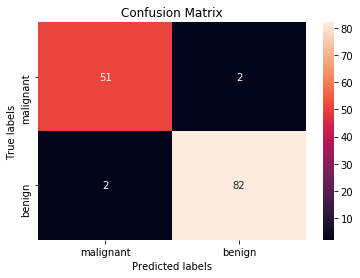

In [36]:
## Accuracy

labels = ['malignant', 'benign']
cm = confusion_matrix(y_test, y_pred, labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['malignant', 'benign']) 
ax.yaxis.set_ticklabels(['malignant', 'benign'])

plt.show()


## Gradient Boost

We will use the [sklearn gradient boost classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for our analysis.

**Important Parameters**

The same as random forests with the addition of:

learning_rate controls the shrinkage to apply to each tree. The default value is 0.1.

criterion changes from what is used in decision trees and random forests. Since we are utilizing psuedo-residuals rather than classification outcomes, we will not use classification purity metrics. Instead, the options are the same as regression models - friedman_mse, mse, and mae. friedman_mse is the default value.


*Note: since GB is robust to overfitting, largest number of trees (n_estimators) are normally used.


In [44]:
parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8],
              'learning_rate':[0.1,0.5, 0.8], 
              'criterion' :['friedman_mse', 'mae']}

gb_class = GridSearchCV(GradientBoostingClassifier(random_state = 8),
                        parameters, n_jobs=3)
gb_class.fit(X=X_train, y=y_train)
gb_model = gb_class.best_estimator_

y_pred = gb_model.predict(X_test)

## Convert strings to ints to work with accuracy score functions
y_pred2 = pd.Series(y_pred).map({'benign':0, 'malignant':1})

results = get_results(y_test, y_pred, results, 'Gradient Boost')

print('The best parameters are {}'.format(print(gb_class.best_params_)))

{'criterion': 'mae', 'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 100}
The best parameters are None


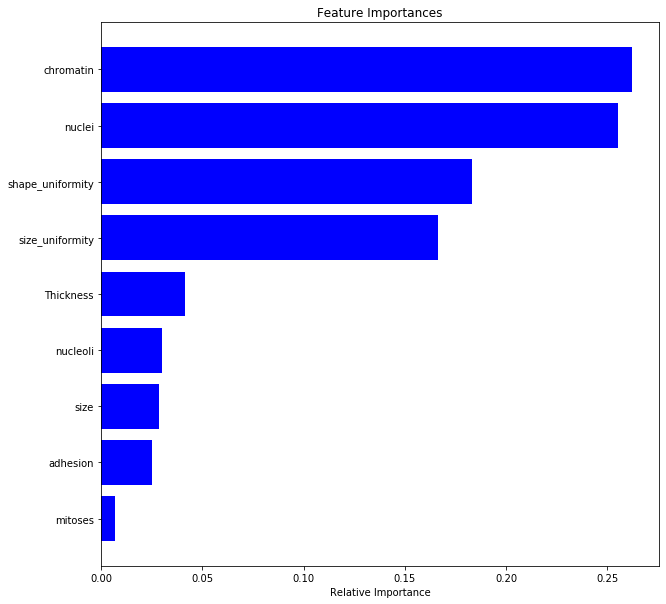

In [45]:
#### Plotting the Variable importance plot

plt.figure(figsize= (10,10))
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

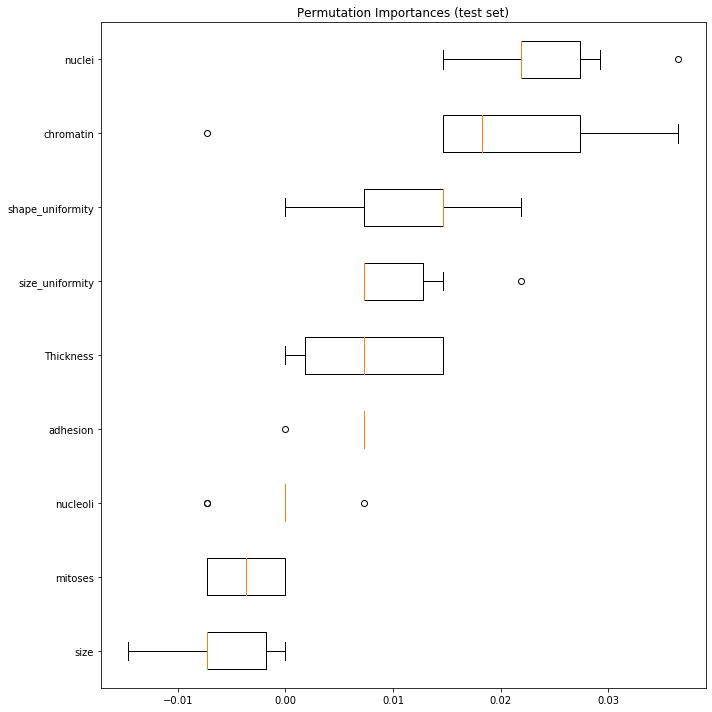

In [46]:
result = permutation_importance(gb_model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (10,10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

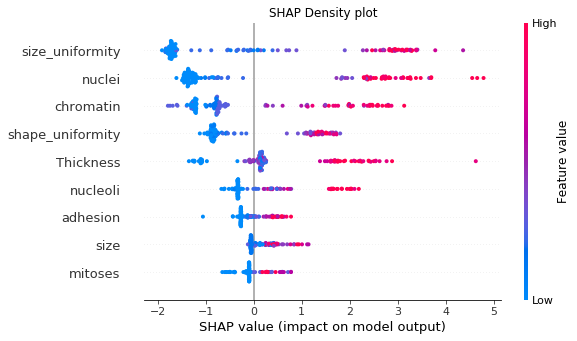

In [98]:
explainer = shap.TreeExplainer(gb_model)
shap_values = explainer.shap_values(X_test)

plt.title('SHAP Density plot')
shap.summary_plot(shap_values, features = X_test)
plt.show()


**What do these plots tell us**

The variable importance and shap plots identify chromatin and nuclei  as the two most important predictors. Size uniformity and shape uniformity also appear important, but to a lesser extent. While these are in a different order than the random forest plot, the fact the four of them are found to be the most important gives additional weight to findings.

The permutation plot backs up these findings.

The shap plot has size_uniformity as the most important followed by nuclei, chromatin and shape_uniformity. We can see that we want to have low values for each of the features in order for them to have a predictive effect. We can also see that size has mostly a harmful impact, with the protective effect being near 0.

**Note**

You should use the plots from the best performing model to draw your inference about feature importance.

In [56]:
results

,accuracy,f1,precision,recall
Decision Tree,0.963504,0.951456,0.98,0.924528
Random Forest,0.985401,0.980769,1,0.962264
Gradient Boost,0.978102,0.971429,0.980769,0.962264


## Looking at the Results

I used the f1 score to determine the best model - which is a weighted average of the precision and recall. However, you might decide that either precision or recall is more important when predicting cancer (is reducing false positives or false negatives more important in the diagnostic process).

The best performing model is the random forest. This is honestly unexpected - as gradient boost is meant to be an improved version of random forest. What might be going on? As we can see from the best selected parameters, a lot of them are at the extreme ends of the range - such as 0.1 for learning rate or min_samples_leaf. This could reflect that we have not found the best results. You could run the model again with different parameters to test outside of the specified range -- such as a learning rate below 0.1 and a min_samples_leaf above 8. Additionally, the large range of values using for learning rate could be hurting the performance of our model. You could also test value such as 0.2 to make sure that the optimal learning rate is not just closer to 0.1 than the next tested value.

Additionally, we used a relatively small number of trees in our ensemble models (to improve run-time). Increasing this parameter could lead to gradient boost outperforming random forest. 

Finally, the different structure of gradient boost (using residuals) may just not be as well suited for the problem as a random forest.

# Exercise

It is now your turn using the pima indians diabetes dataset (found in this folder and online at https://www.kaggle.com/uciml/pima-indians-diabetes-database). Print the tree/variable importance plot, confusion matrix and present your performance metrics. The basic loading and cleaning steps are provided for you.

Don't forget the tuning step! You can use the parameters seen above or select your own.

**Note: For some reason, the get_results function does not work with this output. Instead of using it do the following:**

results.loc['Decision Tree', 'accuracy'] = accuracy_score(y_test2, y_pred2)
results.loc['Decision Tree', 'f1'] = f1_score(y_test2, y_pred2)
results.loc['Decision Tree', 'precision'] = precision_score(y_test2, y_pred2)
results.loc['Decision Tree', 'recall'] = recall_score(y_test2, y_pred2)

Switching out decision tree for the correct model in each section


In [99]:
# Data
pima = pd.read_csv('diabetes.csv')
pima['Outcome'] = pima['Outcome'].astype('category')
pima['Outcome'] = pima['Outcome'].map({0: 'healthy', 1: 'diabetic'})
pima.info()

target = pima['Outcome']
pima.drop('Outcome', axis = 1, inplace = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [63]:
pima.shape

(768, 8)

In [100]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(pima, target, test_size=0.2, random_state=8)


In [101]:
## Set up the results

results = pd.DataFrame(index = ['Decision Tree', 'Random Forest', 'Gradient Boost'], 
                       columns = ['accuracy', 'f1', 'precision', 'recall'])

In [102]:
## Decision Tree

parameters = {'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 'criterion' :['gini', 'entropy']}

clf = GridSearchCV(DecisionTreeClassifier(random_state = 8), parameters, n_jobs=3)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_

y_pred = tree_model.predict(X_test)

## Convert strings to ints to work with accuracy score functions
y_test2 = y_test.map({'healthy':0, 'diabetic':1}).astype('int')
y_pred2 = pd.Series(y_pred).map({'healthy':0, 'diabetic':1}).astype('int')



accuracy = 0.7727272727272727, f1 = 0.6153846153846153. precision = 0.717948717948718, recall = 0.5384615384615384
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2}


Pass labels=['healthy', 'diabetic'] as keyword args. From version 0.25 passing these as positional arguments will result in an error


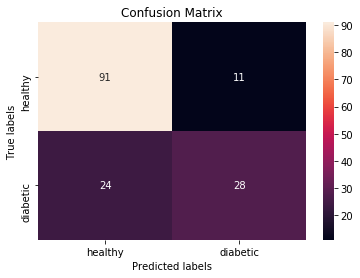

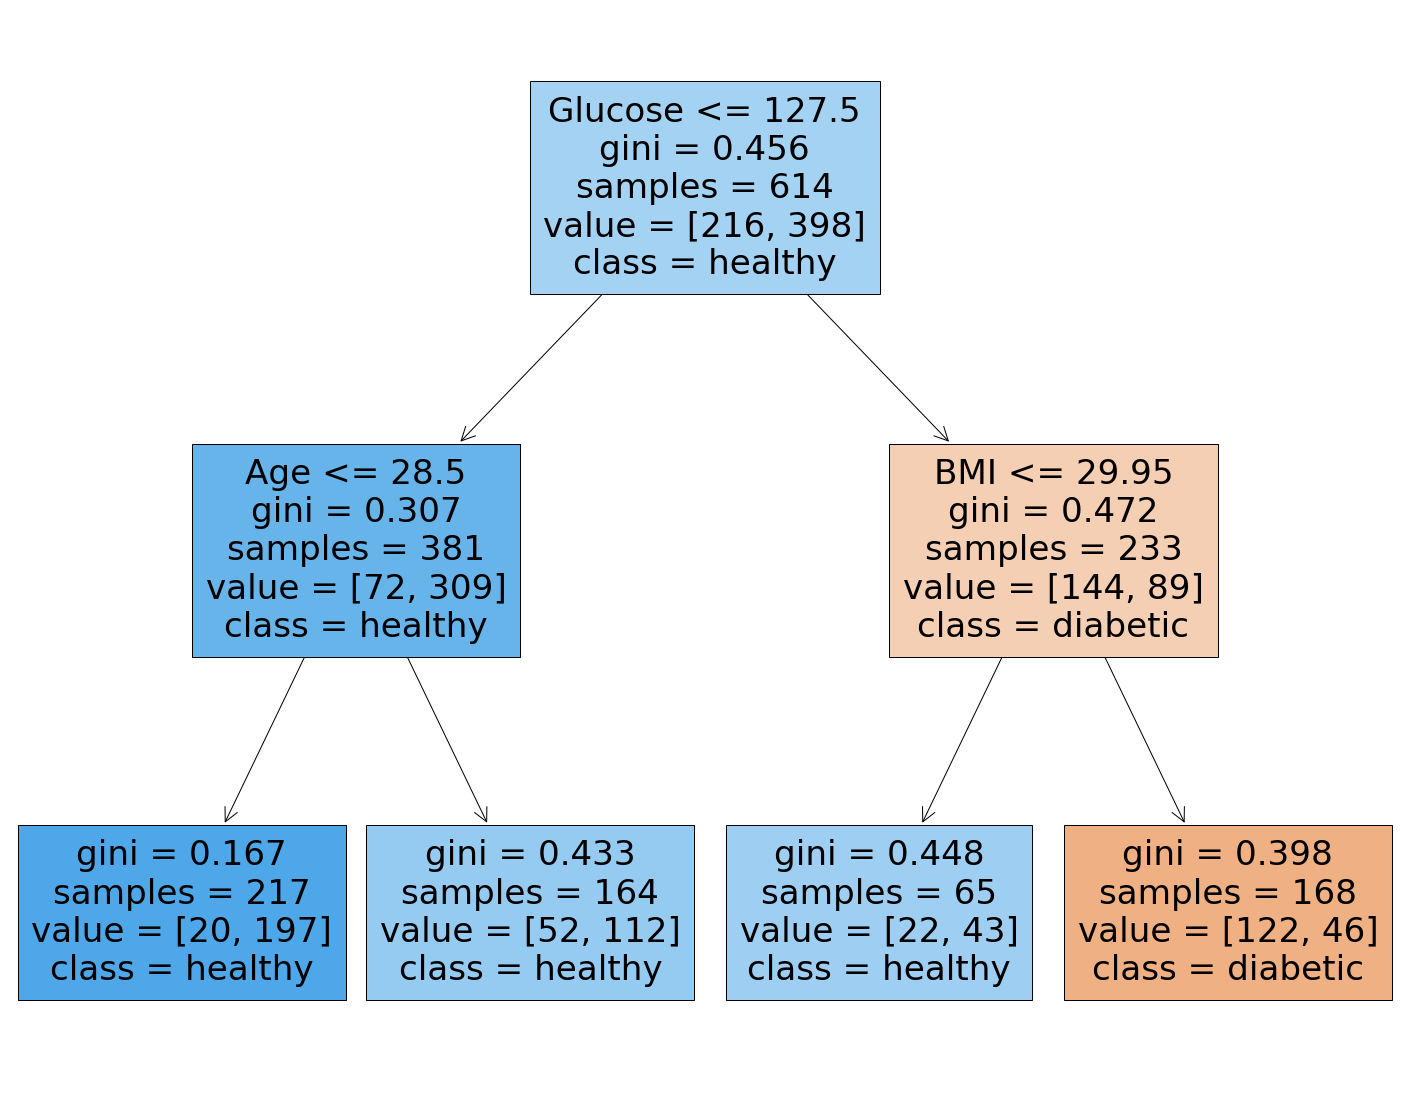

In [106]:
acc = accuracy_score(y_test2, y_pred2)
f1 = f1_score(y_test2, y_pred2)
precision = precision_score(y_test2, y_pred2)
recall = recall_score(y_test2, y_pred2)

print('accuracy = {}, f1 = {}. precision = {}, recall = {}'.format(acc, f1, precision, recall))
print(clf.best_params_)

results.loc['Decision Tree', 'accuracy'] = acc
results.loc['Decision Tree', 'f1'] = f1
results.loc['Decision Tree', 'precision'] = precision
results.loc['Decision Tree', 'recall'] = recall

labels = ['healthy', 'diabetic']
cm = confusion_matrix(y_test, y_pred, labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['healthy', 'diabetic']); 
ax.yaxis.set_ticklabels(['healthy', 'diabetic'])

plt.show()


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model, 
                   feature_names=X_train.columns,  
                   class_names=['diabetic','healthy'],
                   filled=True)

fig.savefig("decistion_tree_CV.pdf") # Easy to see the graph here

In [114]:
## random forest

parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8], 'criterion' :['gini', 'entropy']}

rf_class = GridSearchCV(RandomForestClassifier(random_state = 8), parameters, n_jobs=3)
rf_class.fit(X=X_train, y=y_train)
rf_model = rf_class.best_estimator_

y_pred = rf_model.predict(X_test)

## Convert strings to ints to work with accuracy score functions
y_pred2 = pd.Series(y_pred).map({'healthy':0, 'diabetic':1})

results.loc['Random Forest', 'accuracy'] = accuracy_score(y_test2, y_pred2)
results.loc['Random Forest', 'f1'] = f1_score(y_test2, y_pred2)
results.loc['Random Forest', 'precision'] = precision_score(y_test2, y_pred2)
results.loc['Random Forest', 'recall'] = recall_score(y_test2, y_pred2)


print('The best parameters are {}'.format(rf_class.best_params_))

The best parameters are {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 250}


In [115]:
results

,accuracy,f1,precision,recall
Decision Tree,0.772727,0.615385,0.717949,0.538462
Random Forest,0.772727,0.623656,0.707317,0.557692
Gradient Boost,NaN,NaN,NaN,NaN


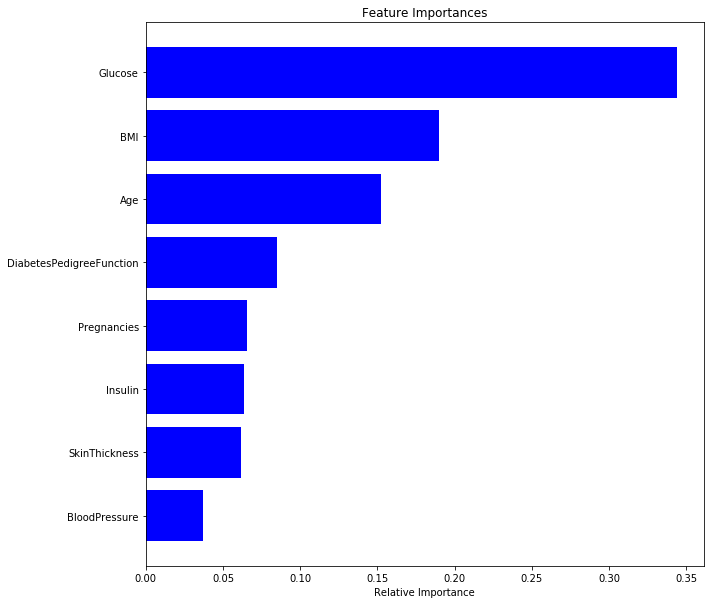

In [101]:
#### Plotting the Variable importance plot

plt.figure(figsize= (10,10))
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

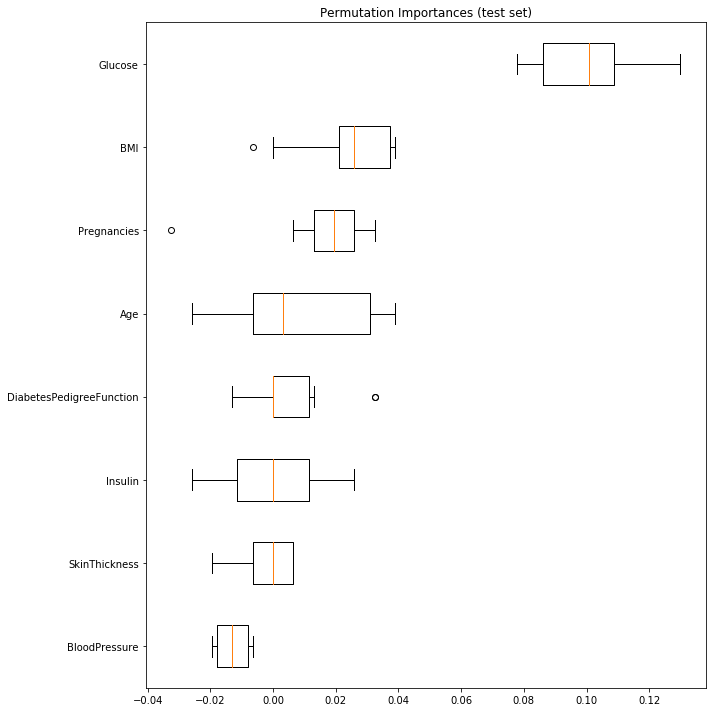

In [102]:
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (10,10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

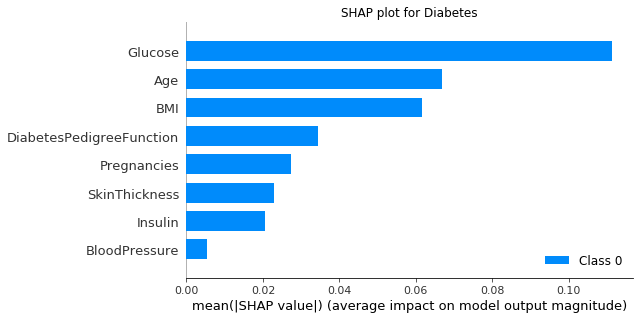

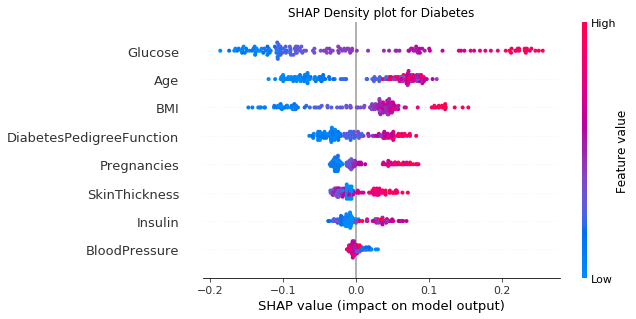

In [118]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

plt.title('SHAP plot for Diabetes')
shap.summary_plot(shap_values, features = X_test, class_inds = [0])
plt.show()

plt.title('SHAP Density plot for Diabetes')
shap.summary_plot(shap_values[0], features = X_test)
plt.show()


Pass labels=['healthy', 'diabetic'] as keyword args. From version 0.25 passing these as positional arguments will result in an error


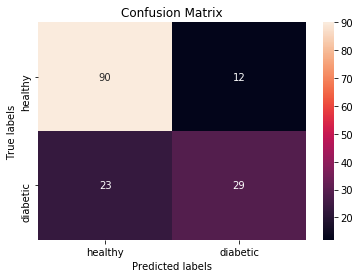

In [104]:
## Accuracy

labels = ['healthy', 'diabetic']
cm = confusion_matrix(y_test, y_pred, labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['healthy', 'diabetic']) 
ax.yaxis.set_ticklabels(['healthy', 'diabetic'])

plt.show()



In [119]:
## Gradient Boost

parameters = {'max_features':['sqrt'], 'n_estimators':[50,100,250],
              'max_depth':range(2,7),'min_samples_leaf':[2,4,6,8],
              'learning_rate':[0.1,0.5, 0.8], 'criterion' :['friedman_mse', 'mae']}

gb_class = GridSearchCV(GradientBoostingClassifier(random_state = 8), parameters, n_jobs=3)
gb_class.fit(X=X_train, y=y_train)
gb_model = gb_class.best_estimator_

y_pred = gb_model.predict(X_test)

## Convert strings to ints to work with accuracy score functions
y_pred2 = pd.Series(y_pred).map({'healthy':0, 'diabetic':1})

results.loc['Gradient Boost', 'accuracy'] = accuracy_score(y_test2, y_pred2)
results.loc['Gradient Boost', 'f1'] = f1_score(y_test2, y_pred2)
results.loc['Gradient Boost', 'precision'] = precision_score(y_test2, y_pred2)
results.loc['Gradient Boost', 'recall'] = recall_score(y_test2, y_pred2)



print('The best parameters are {}'.format(gb_class.best_params_))

The best parameters are {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 100}


In [120]:
results

,accuracy,f1,precision,recall
Decision Tree,0.772727,0.615385,0.717949,0.538462
Random Forest,0.772727,0.623656,0.707317,0.557692
Gradient Boost,0.720779,0.598131,0.581818,0.615385


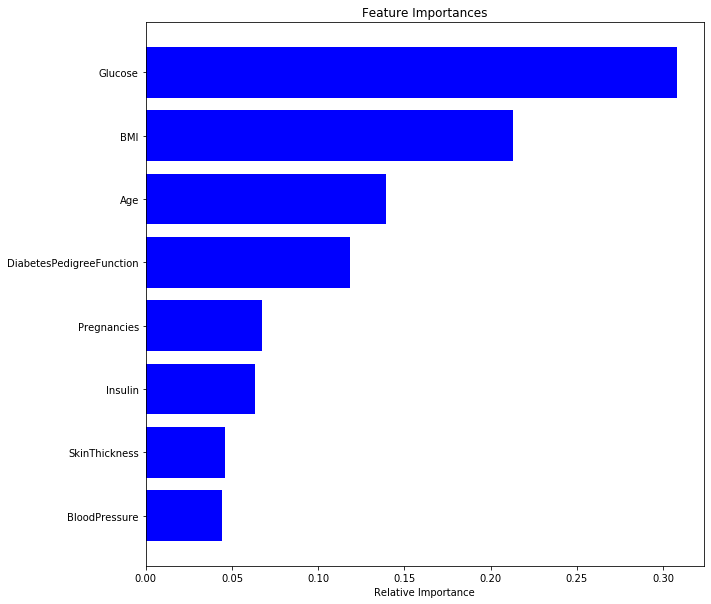

In [106]:
#### Plotting the Variable importance plot

plt.figure(figsize= (10,10))
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

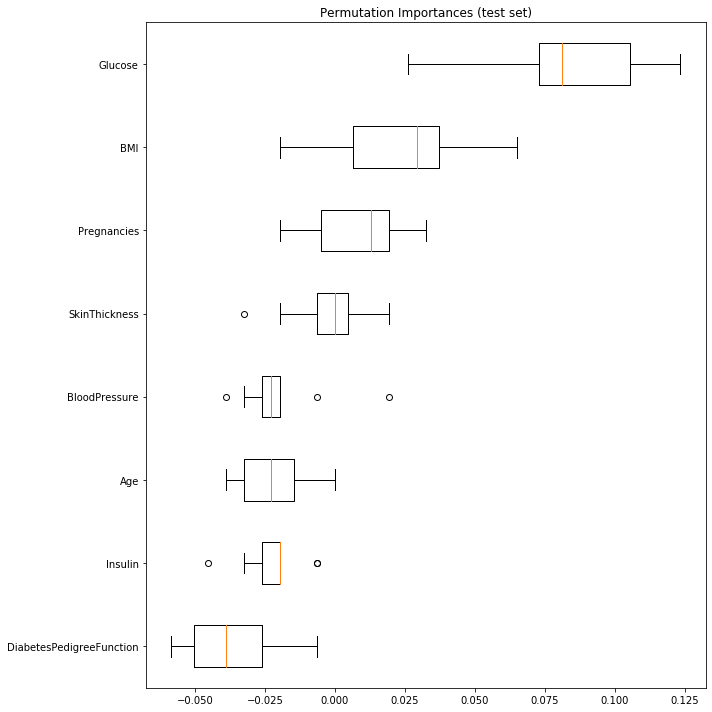

In [107]:
result = permutation_importance(gb_model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (10,10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

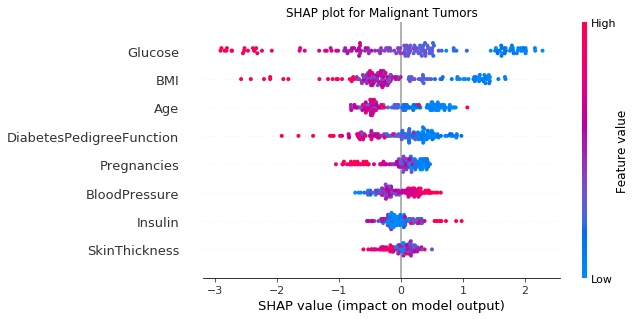

In [123]:
explainer = shap.TreeExplainer(gb_model)
shap_values = explainer.shap_values(X_test)

plt.title('SHAP plot for Diabetes')
shap.summary_plot(shap_values, features = X_test)
plt.show()




Pass labels=['healthy', 'diabetic'] as keyword args. From version 0.25 passing these as positional arguments will result in an error


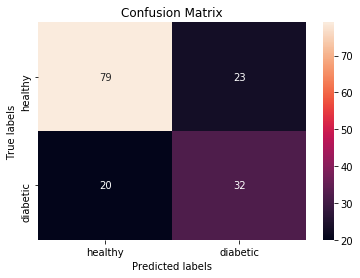

In [109]:
## Accuracy

labels = ['healthy', 'diabetic']
cm = confusion_matrix(y_test, y_pred, labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['healthy', 'diabetic']) 
ax.yaxis.set_ticklabels(['healthy', 'diabetic'])

plt.show()



In [110]:
results

,accuracy,f1,precision,recall
Decision Tree,0.772727,0.615385,0.717949,0.538462
Random Forest,0.772727,0.623656,0.707317,0.557692
Gradient Boost,0.720779,0.598131,0.581818,0.615385


# Extra Resources


[Decision Trees](https://towardsdatascience.com/a-guide-to-decision-trees-for-machine-learning-and-data-science-fe2607241956)

[Decision Tree Implementation from Scratch - no packages/pre-made algorithms](https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/)

[Regression Decision Tree with Python](https://stackabuse.com/decision-trees-in-python-with-scikit-learn/)

[random forest](https://machinelearningmastery.com/random-forest-ensemble-in-python/)

[COVID Prediction using Boosting](https://www.frontiersin.org/articles/10.3389/fpubh.2020.00357/full)

[Predicting disease from imbalanced data](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/1472-6947-11-51)

[Feature Ranking and Random Forest](https://www.sciencedirect.com/science/article/pii/S235291481930019X)

[Pruned Random Forest](https://link.springer.com/article/10.1007/s00607-019-00785-6)

[Gradient Boost with lots more links](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)

